In [4]:
import numpy as np
import pandas as pd

import main, clean

## Resultados de las condiciones base

In [5]:
# Importar condiciones base
base_conditions = clean.convert("EscenarioA.csv", ",", True)[0]


Obtained a dataframe with the following fields:

 LastMilestoneAcheivedColumn     int64
Created                        object
Removed                        object
PID                             int64
Unnamed: 4                      int64
dtype: object 


Dataframe description:
####################################################################################################
     LastMilestoneAcheivedColumn              Created             Removed  PID  \
0                             3   18/08/2020 8:02:56  18/08/2020 8:22:43    1   
1                             3   18/08/2020 8:06:56  18/08/2020 9:11:09    2   
2                             3   18/08/2020 8:07:00  18/08/2020 8:31:06    3   
3                             3   18/08/2020 8:07:55  18/08/2020 9:10:49    4   
4                             3   18/08/2020 8:09:05  18/08/2020 8:55:29    5   
..                          ...                  ...                 ...  ...   
95                            3  18/08/2020 16:50:

In [6]:
FORMAT = '%d/%m/%Y %H:%M:%S'

def clean_results(df, format_=FORMAT, print_intermediate=False):
    """
    Convertir las fechas almacenadas como texto al formato de Python para fechas
    """

    for column in ["Created", "Removed"]:
        dates = pd.to_datetime(df[column], format=format_)
        dates = [x.to_pydatetime() for x in dates]
        df[column] = dates
        
    if print_intermediate: print(df)
    
    return df

base_conditions = clean_results(base_conditions, FORMAT, True)

    LastMilestoneAcheivedColumn             Created             Removed  PID  \
0                             3 2020-08-18 08:02:56 2020-08-18 08:22:43    1   
1                             3 2020-08-18 08:06:56 2020-08-18 09:11:09    2   
2                             3 2020-08-18 08:07:00 2020-08-18 08:31:06    3   
3                             3 2020-08-18 08:07:55 2020-08-18 09:10:49    4   
4                             3 2020-08-18 08:09:05 2020-08-18 08:55:29    5   
..                          ...                 ...                 ...  ...   
95                            3 2020-08-18 16:50:09 2020-08-19 01:50:52   96   
96                            3 2020-08-18 16:53:31 2020-08-19 01:51:16   97   
97                            3 2020-08-18 16:55:11 2020-08-19 02:24:14   98   
98                            3 2020-08-18 16:56:40 2020-08-19 02:03:57   99   
99                            3 2020-08-18 16:59:45 2020-08-19 02:25:13  100   

    Unnamed: 4  
0            0  
1    

In [7]:
COLUMN_NAMES = {"Created": {
                    "es": "entrada", "en":"Created"},
                "Removed": {
                    "es": "salida", "en":"Removed"},
                "Duration": {
                    "es": "duracion", "en":"Duration"},
                "Hour": {
                    "es": "hora", "en":"Hour"},
               }

def add_info(df, language_to="es", language_from="en", column_names=COLUMN_NAMES, print_intermediate=False):
    """
    Añadir información adicional y cambiar los nombres de las columnas
    """
    
    # Calcular duración de estadía
    deltas = df["Removed"] - df["Created"]
    # Convertir a minutos e insertar en dataframe
    df["Duration"] = pd.to_numeric(deltas).div(10**9).div(60)
    # Añadir una columna con la hora a la que llegó el paciente
    df["Hour"] = [x.hour for x in df["Created"]]
    # Cambiar nombres
    translations = { column_names[x][language_from]: column_names[x][language_to] for x in column_names.keys()}
    df = df.rename(columns=translations)
    if print_intermediate: print(df)

    return df

base_conditions = add_info(base_conditions)

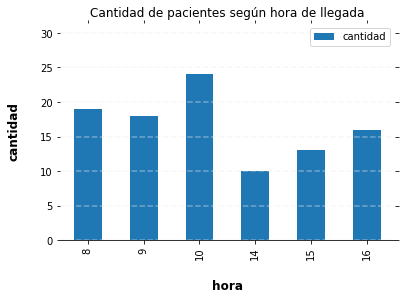

In [8]:
def chart1(df, column):
    title, x_axisname, y_axisname = "Cantidad de pacientes según hora de llegada", "hora", "cantidad"
    ax1 = clean.build_count_barchart(df, title, x_axisname, y_axisname, None, False)
    clean.customizechart(ax1, title, x_axisname, y_axisname)

chart1(base_conditions, 'hora')

In [9]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
(base_conditions['duracion'].to_frame()).describe()

,duracion
count,100.0
mean,328.0
std,148.3
min,19.8
25%,219.2
50%,340.1
75%,452.0
max,583.7


In [10]:
# Hora a la que salió el último paciente
base_conditions['salida'].max()

Timestamp('2020-08-19 02:25:13')

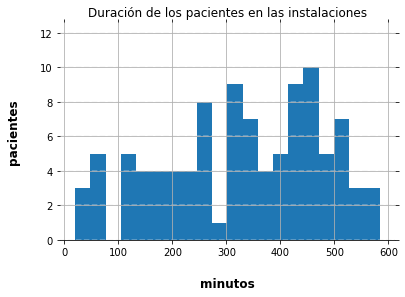

In [11]:
def chart2(df, column):
    
    bins=20
    data=df[column]
    ax = data.hist(bins=bins)
    title, xlabel, ylabel = "Duración de los pacientes en las instalaciones", "minutos", "pacientes"
    clean.customizechart(ax, title, xlabel, ylabel)    

chart2(base_conditions, 'duracion')

## Resultados del escenario B

In [12]:
scenario_b = clean.convert("EscenarioB.csv", ",", False)[0]
scenario_b = clean_results(scenario_b, FORMAT, False)
scenario_b = add_info(scenario_b)

In [13]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
(scenario_b['duracion'].to_frame()).describe()

,duracion
count,100.0
mean,84.6
std,45.8
min,6.2
25%,48.6
50%,76.3
75%,114.1
max,189.2


In [14]:
# Hora a la que salió el último paciente
scenario_b['salida'].max()

Timestamp('2020-08-18 18:56:51')

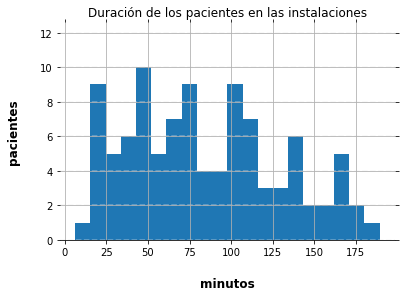

In [15]:
chart2(scenario_b, 'duracion')

## Resultados del escenario C

In [16]:
scenario_c = clean.convert("EscenarioC.csv", ",", False)[0]
scenario_c = clean_results(scenario_c, FORMAT, False)
scenario_c = add_info(scenario_c)

In [17]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
(scenario_c['duracion'].to_frame()).describe()

,duracion
count,100.0
mean,64.0
std,31.0
min,6.2
25%,41.4
50%,60.1
75%,84.8
max,161.9


In [18]:
# Hora a la que salió el último paciente
scenario_c['salida'].max()

Timestamp('2020-08-18 18:24:51')

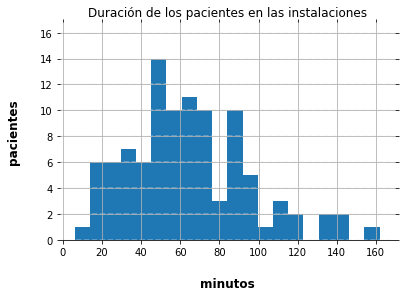

In [19]:
chart2(scenario_c, 'duracion')

## Caracterización estadística del escenario C
[https://pythonhealthcare.org/2018/05/03/81-distribution-fitting-to-data/][1]

[1]: https://pythonhealthcare.org/2018/05/03/81-distribution-fitting-to-data/

In [20]:
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
# Load data and select first column

from sklearn import datasets
y = [scenario_c.duracion[x] for x in list(range(len(scenario_c['duracion'])))] 
y = np.array(y)
y = y[~np.isnan(y)]

# Create an index array (x) for data
x = np.arange(len(y))
size = len(y)

In [21]:
sc=StandardScaler() 
yy = y.reshape (-1,1)
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()
y_std
del yy

In [22]:
# Set list of distributions to test
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")

# Set up list of candidate distributions to use
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

dist_names = ['beta',
#               'expon',
              'gamma',
#               'lognorm',
              'norm',
#               'pearson3',
#               'triang',
#               'uniform',
#               'weibull_min', 
#               'weibull_max'
             ]

# Set up empty lists to stroe results
chi_square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)    
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square.append(ss)
        
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------')
print (results)


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution  chi_square  p_value
1        gamma         6.0      0.9
0         beta         6.3      0.9
2         norm        39.7      0.2


[(5.458680083761448, -8.55298346464852, 13.289624018741002)]
[(5.458680083761448, -8.55298346464852, 13.289624018741002), (4.140567906494785, 30.405423324372435, -3.888865826737657, 566.3519677081354)]
[(5.458680083761448, -8.55298346464852, 13.289624018741002), (4.140567906494785, 30.405423324372435, -3.888865826737657, 566.3519677081354), (63.99083333333332, 30.883121997388077)]


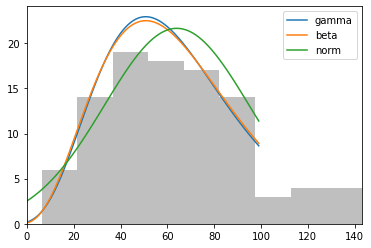


Distribution parameters:
------------------------

Distribution: gamma
Parameters: (5.458680083761448, -8.55298346464852, 13.289624018741002)

Distribution: beta
Parameters: (4.140567906494785, 30.405423324372435, -3.888865826737657, 566.3519677081354)

Distribution: norm
Parameters: (63.99083333333332, 30.883121997388077)


In [23]:
# Divide the observed data into 100 bins for plotting (this can be changed)
number_of_bins = 10
bin_cutoffs = np.linspace(np.percentile(y,0), np.percentile(y,99),number_of_bins)

# Create the plot
h = plt.hist(y, bins = bin_cutoffs, color='0.75')

# Get the top three distributions from the previous phase
number_distributions_to_plot = 3
dist_names = results['Distribution'].iloc[0:number_distributions_to_plot]

# Create an empty list to stroe fitted distribution parameters
parameters = []

# Loop through the distributions ot get line fit and paraemters

for dist_name in dist_names:
    # Set up distribution and store distribution paraemters
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    parameters.append(param)
    print(parameters)
    
    # Get line for each distribution (and scale to match observed data)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    scale_pdf = np.trapz (h[0], h[1][:-1]) / np.trapz (pdf_fitted, x)
    pdf_fitted *= scale_pdf
    
    # Add the line to the plot
    plt.plot(pdf_fitted, label=dist_name)
    
    # Set the plot x axis to contain 99% of the data
    # This can be removed, but sometimes outlier data makes the plot less clear
    plt.xlim(0,np.percentile(y,99))

# Add legend and display plot

plt.legend()
plt.show()

# Store distribution paraemters in a dataframe (this could also be saved)
dist_parameters = pd.DataFrame()
dist_parameters['Distribution'] = (
        results['Distribution'].iloc[0:number_distributions_to_plot])
dist_parameters['Distribution parameters'] = parameters

# Print parameter results
print ('\nDistribution parameters:')
print ('------------------------')

for index, row in dist_parameters.iterrows():
    print ('\nDistribution:', row[0])
    print ('Parameters:', row[1] )

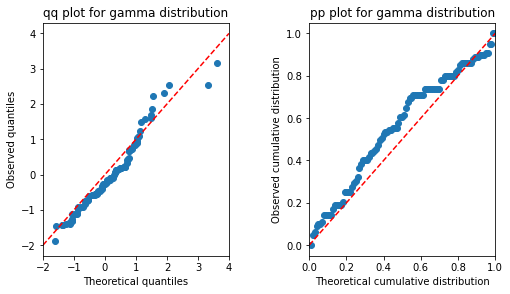

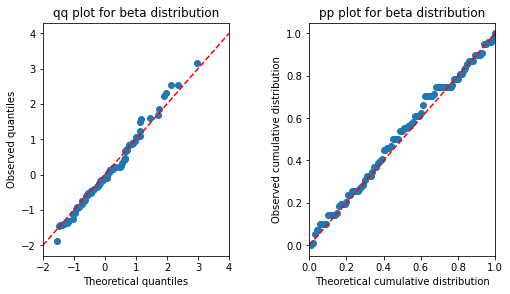

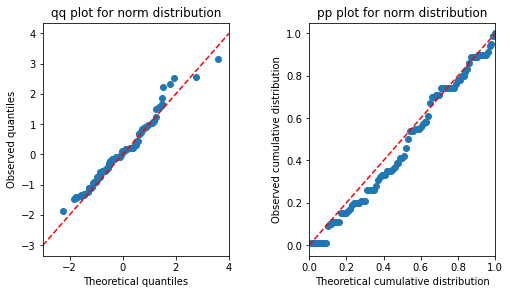

In [24]:
# qq and pp plots
    
data = y_std.copy()
data.sort()

# Loop through selected distributions (as previously selected)

for distribution in dist_names:
    # Set up distribution
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Get random numbers from distribution
    norm = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = size)
    norm.sort()
    
    # Create figure
    fig = plt.figure(figsize=(8,5)) 
    
    # qq plot
    ax1 = fig.add_subplot(121) # Grid of 2x2, this is suplot 1
    ax1.plot(norm,data,"o")
    min_value = np.floor(min(min(norm),min(data)))
    max_value = np.ceil(max(max(norm),max(data)))
    ax1.plot([min_value,max_value],[min_value,max_value],'r--')
    ax1.set_xlim(min_value,max_value)
    ax1.set_xlabel('Theoretical quantiles')
    ax1.set_ylabel('Observed quantiles')
    title = 'qq plot for ' + distribution +' distribution'
    ax1.set_title(title)
    
    # pp plot
    ax2 = fig.add_subplot(122)
    
    # Calculate cumulative distributions
    bins = np.percentile(norm,range(0,101))
    data_counts, bins = np.histogram(data,bins)
    norm_counts, bins = np.histogram(norm,bins)
    cum_data = np.cumsum(data_counts)
    cum_norm = np.cumsum(norm_counts)
    cum_data = cum_data / max(cum_data)
    cum_norm = cum_norm / max(cum_norm)
    
    # plot
    ax2.plot(cum_norm,cum_data,"o")
    min_value = np.floor(min(min(cum_norm),min(cum_data)))
    max_value = np.ceil(max(max(cum_norm),max(cum_data)))
    ax2.plot([min_value,max_value],[min_value,max_value],'r--')
    ax2.set_xlim(min_value,max_value)
    ax2.set_xlabel('Theoretical cumulative distribution')
    ax2.set_ylabel('Observed cumulative distribution')
    title = 'pp plot for ' + distribution +' distribution'
    ax2.set_title(title)
    
    # Display plot    
    plt.tight_layout(pad=4)
    plt.show()